# Problem 1

iter     x_k               y_k               f_k               p (rate)
--------------------------------------------------------------------------
  0   -4.00000000e+00   3.00000000e+00   1.69250000e+04          -
  1   -3.80154296e+00   3.02479521e+00   1.30805361e+04   9.67660000e-01
  2   -3.60324887e+00   3.05086154e+00   9.88672669e+03   9.67075319e-01
  3   -3.40514463e+00   3.07833354e+00   7.27278299e+03   9.66537955e-01
  4   -3.20726331e+00   3.10736772e+00   5.17174957e+03   9.66068769e-01
  5   -3.00964597e+00   3.13814738e+00   3.52050591e+03   9.65694561e-01
  6   -2.81234417e+00   3.17088878e+00   2.25976885e+03   9.65449595e-01
  7   -2.61542339e+00   3.20584885e+00   1.33409621e+03   9.65377431e-01
  8   -2.41896777e+00   3.24333470e+00   6.91892445e+02   9.65532999e-01
  9   -2.22308638e+00   3.28371392e+00   2.85417054e+02   9.65984584e-01
 10   -2.02791996e+00   3.32741825e+00   7.07972543e+01   9.66813999e-01
 11   -1.83363080e+00   3.37487055e+00   8.04551297e+00 

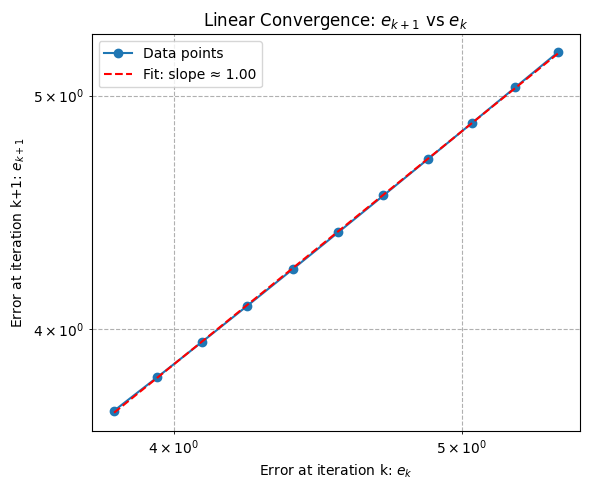

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function: Rosenbrock
def f(x):
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

# Gradient
def gradf(x):
    df_dx = -2*(1 - x[0]) - 400*x[0]*(x[1] - x[0]**2)
    df_dy = 200*(x[1] - x[0]**2)
    return np.array([df_dx, df_dy])

# Initialization
xk = np.array([-4.0, 3.0])
alpha = 0.2
x_star = np.array([1.0, 1.0])
errors = [np.linalg.norm(xk - x_star)]
rates = []

# Iteration header
fk = f(xk)
k = 0
print("iter     x_k               y_k               f_k               p (rate)")
print("--------------------------------------------------------------------------")
print(f"{k:3d}   {xk[0]:.8e}   {xk[1]:.8e}   {fk:.8e}   {'-':>8}")

# Steepest descent iteration
xk_prev = xk.copy()
for k in range(1, 10000):
    grad_fk = gradf(xk)
    pk = -grad_fk / np.linalg.norm(grad_fk)
    x_new = xk + alpha * pk

    if f(x_new) >= f(xk):
        break

    fk = f(x_new)
    err = np.linalg.norm(x_new - x_star)
    errors.append(err)


    # Convergence rate estimate
    e_k = np.linalg.norm(xk - x_star)
    e_k1 = err
    rate = e_k1 / e_k
    rates.append(rate)

    print(f"{k:3d}   {x_new[0]:.8e}   {x_new[1]:.8e}   {fk:.8e}   {rate:.8e}")

    xk_prev = xk.copy()
    xk = x_new

plt.show()

# Log-log plot of e_{k+1} vs e_k
ek = np.array(errors[:-1])
ek1 = np.array(errors[1:])

plt.figure(figsize=(6, 5))
plt.loglog(ek, ek1, marker='o', label='Data points')

if len(ek) >= 2:
    log_ek = np.log(ek)
    log_ek1 = np.log(ek1)
    slope, intercept = np.polyfit(log_ek, log_ek1, 1)
    fit_line = np.exp(intercept) * ek**slope
    plt.loglog(ek, fit_line, 'r--', label=f'Fit: slope ≈ {slope:.2f}')
else:
    print("Not enough data points to estimate convergence rate.")

plt.title("Linear Convergence: $e_{k+1}$ vs $e_k$")
plt.xlabel("Error at iteration k: $e_k$")
plt.ylabel("Error at iteration k+1: $e_{k+1}$")
plt.grid(True, which="both", ls="--")
plt.legend()
plt.tight_layout()
plt.show()

# Problem 2

iter     x_k               y_k               f_k               p (rate)
--------------------------------------------------------------------------
  0   2.00000000e+00   -4.00000000e+00   1.70000000e+01          -
  1   1.88819660e+00   -3.77639320e+00   1.05799922e+01          -
  2   1.77639320e+00   -3.55278640e+00   6.17697464e+00   8.741231e-01
  3   1.66458980e+00   -3.32917961e+00   3.31637488e+00   8.559964e-01
  4   1.55278640e+00   -3.10557281e+00   1.58737061e+00   8.317708e-01
  5   1.44098301e+00   -2.88196601e+00   6.42889502e-01   7.977458e-01
  6   1.32917961e+00   -2.65835921e+00   1.99609226e-01   7.464678e-01
  7   1.21737621e+00   -2.43475242e+00   3.79574435e-02   6.603575e-01
  8   1.10557281e+00   -2.21114562e+00   2.11182161e-03   4.856686e-01
  9   9.93769410e-01   -1.98753882e+00   2.56192010e-08   5.901699e-02


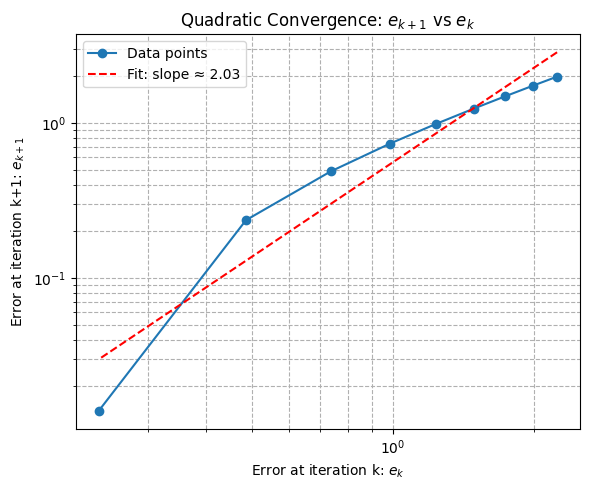

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function: Quartic Bowl
def f(x, y):
    return (x - 1)**4 + (y + 2)**4

# Gradient
def gradf(x, y):
    return np.array([4 * (x - 1)**3, 4 * (y + 2)**3])

# Hessian
def hessf(x, y):
    return np.array([
        [12 * (x - 1)**2, 0],
        [0, 12 * (y + 2)**2]
    ])

# Initializatiom
xk = np.array([2.0, -4.0])  # Far from minimum
alpha = 0.25
x_star = np.array([1.0, -2.0])  # Known minimum

# Iteration header
fk = f(xk[0], xk[1])
k = 0
print("iter     x_k               y_k               f_k               p (rate)")
print("--------------------------------------------------------------------------")
print(f"{k:3d}   {xk[0]:.8e}   {xk[1]:.8e}   {fk:.8e}   {'-':>8}")

# Newton iteration
KeepIterate = True
xk_prev = xk.copy()
errors = [np.linalg.norm(xk - x_star)]
rates = []

while KeepIterate and k < 50:
    gradfk = gradf(xk[0], xk[1])
    hessfk = hessf(xk[0], xk[1])
    pk = -np.linalg.solve(hessfk, gradfk)
    pk = pk / np.linalg.norm(pk)

    xknew = xk + alpha * pk
    fktest = f(xknew[0], xknew[1])

    if fktest < fk:
        k += 1
        xk = xknew
        fk = fktest
        err = np.linalg.norm(xk - x_star)
        errors.append(err)

        if k > 1:
            e_k = np.linalg.norm(xk_prev - x_star)
            e_k1 = err
            rate = e_k1 / (e_k)
            rates.append(rate)
            print(f"{k:3d}   {xk[0]:.8e}   {xk[1]:.8e}   {fk:.8e}   {rate:8e}")
        else:
            print(f"{k:3d}   {xk[0]:.8e}   {xk[1]:.8e}   {fk:.8e}   {'-':>8}")

        xk_prev = xk.copy()
    else:
        KeepIterate = False

# Plot e_{k+1} vs e_k
ek = np.array(errors[:-1])     # e_k
ek1 = np.array(errors[1:])     # e_{k+1}

plt.figure(figsize=(6, 5))
plt.loglog(ek, ek1, marker='o', label='Data points')

# 🔍 Fit a line in log-log space
if len(ek) >= 2:
    log_ek = np.log(ek)
    log_ek1 = np.log(ek1)
    slope, intercept = np.polyfit(log_ek, log_ek1, 1)
    fit_line = np.exp(intercept) * ek**slope
    plt.loglog(ek, fit_line, 'r--', label=f'Fit: slope ≈ {slope:.2f}')


plt.title("Quadratic Convergence: $e_{k+1}$ vs $e_k$")
plt.xlabel("Error at iteration k: $e_k$")
plt.ylabel("Error at iteration k+1: $e_{k+1}$")
plt.grid(True, which="both", ls="--")
plt.legend()
plt.tight_layout()
plt.show()

# Problem 3

iter     x_k               y_k               f_k               alpha_k
--------------------------------------------------------------------------
  0   2.50000000e-01   1.50000000e-01   3.21019761e-01   1.00000000e+00
  1   -2.12833067e-03   -3.44829711e-01   5.90744588e-03   2.50000000e-01
  2   6.91767350e-01   -3.42369938e-01   -7.24965577e-01   2.50000000e-01
  3   4.95970440e-01   -4.96132343e-01   -9.99846061e-01   1.25000000e-01
  4   5.00941211e-01   -5.00903374e-01   -9.99991601e-01   1.25000000e-01
  5   4.99780045e-01   -4.99788887e-01   -9.99999541e-01   1.25000000e-01
  6   5.00051404e-01   -5.00049337e-01   -9.99999975e-01   1.25000000e-01
  7   4.99987987e-01   -4.99988470e-01   -9.99999999e-01   1.25000000e-01
  8   5.00002807e-01   -5.00002695e-01   -1.00000000e+00   1.25000000e-01
  9   4.99999344e-01   -4.99999370e-01   -1.00000000e+00   1.25000000e-01
 10   5.00000153e-01   -5.00000147e-01   -1.00000000e+00   1.25000000e-01
 11   4.99999964e-01   -4.99999966e-01   -

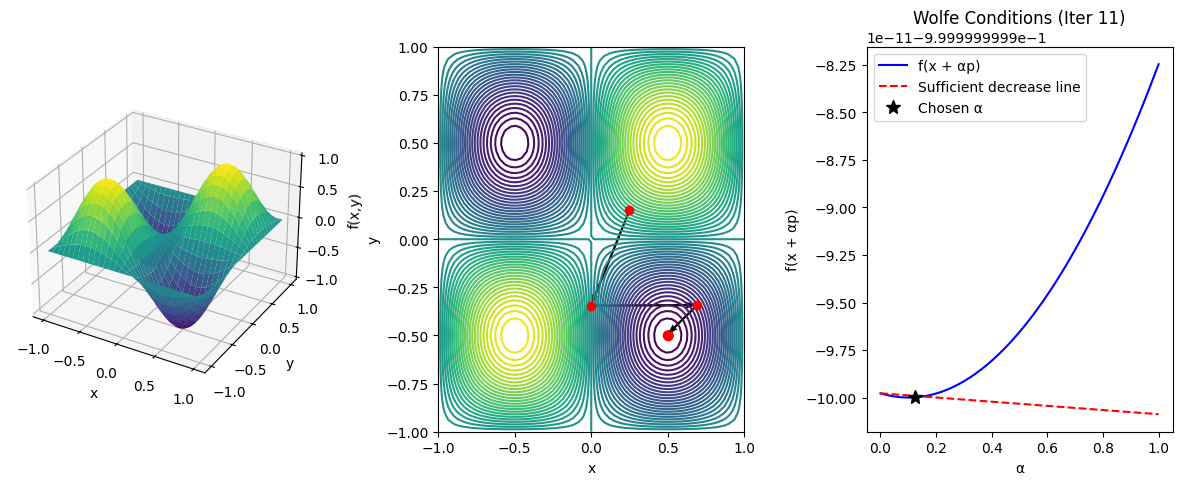

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function and its gradient
def f(x):
    return np.sin(np.pi * x[0]) * np.sin(np.pi * x[1])

def gradf(x):
    df_dx = np.pi * np.cos(np.pi * x[0]) * np.sin(np.pi * x[1])
    df_dy = np.pi * np.cos(np.pi * x[1]) * np.sin(np.pi * x[0])
    return np.array([df_dx, df_dy])

# Create meshgrid for surface and contour plots
N = 60
x = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x, x)
Z = np.sin(np.pi * X) * np.sin(np.pi * Y)

# Plot setup
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x,y)')

ax2 = fig.add_subplot(1, 3, 2)
ax2.contour(X, Y, Z, levels=60)
ax2.set_xlabel('x')
ax2.set_ylabel('y')

# Right panel for Wolfe condition
ax3 = fig.add_subplot(1, 3, 3)
ax3.set_xlabel('α')
ax3.set_ylabel('f(x + αp)')
ax3.set_title('Wolfe Conditions')
curve1, = ax3.plot([], [], '-b', label='f(x + αp)')
curve2, = ax3.plot([], [], '--r', label='Sufficient decrease line')
point1, = ax3.plot([], [], '*k', markersize=10, label='Chosen α')
ax3.legend()

# Initial point
xk = np.array([0.25, 0.15])
fk = f(xk)
print("iter     x_k               y_k               f_k               alpha_k")
print("--------------------------------------------------------------------------")
print(f"{0:3d}   {xk[0]:.8e}   {xk[1]:.8e}   {fk:.8e}   {1:.8e}")

# Wolfe parameters
c1 = 0.25
c2 = 0.9
alpha_max = 1.0
max_iter = 100

# Main iteration loop with stopping criterion
k = 0
while np.linalg.norm(gradf(xk)) > 1e-6 and k < max_iter:
    k += 1
    ax2.plot(xk[0], xk[1], 'ro')
    gradfk = gradf(xk)
    pk = -gradfk

    # Define phi(α) and phi'(α)
    def phi(alpha): return f(xk + alpha * pk)
    def dphi(alpha): return np.dot(gradf(xk + alpha * pk), pk)
    phi0 = phi(0)
    dphi0 = dphi(0)

    # Initial step size
    alpha_prev = 0
    alpha_curr = 1.0
    found = False

    # Line search (Algorithm 3.5)
    for i in range(20):
        phi_curr = phi(alpha_curr)
        if (phi_curr > phi0 + c1 * alpha_curr * dphi0) or (i > 1 and phi_curr >= phi(alpha_prev)):
            alpha_lo = alpha_prev
            alpha_hi = alpha_curr
            break
        dphi_curr = dphi(alpha_curr)
        if abs(dphi_curr) <= -c2 * dphi0:
            alpha = alpha_curr
            found = True
            break
        if dphi_curr >= 0:
            alpha_lo = alpha_curr
            alpha_hi = alpha_prev
            break
        alpha_prev = alpha_curr
        alpha_curr = (alpha_curr + alpha_max) / 2

    # Zoom phase (Algorithm 3.6)
    if not found:
        for j in range(20):
            alpha_j = (alpha_lo + alpha_hi) / 2
            phi_j = phi(alpha_j)
            if (phi_j > phi0 + c1 * alpha_j * dphi0) or (phi_j >= phi(alpha_lo)):
                alpha_hi = alpha_j
            else:
                dphi_j = dphi(alpha_j)
                if abs(dphi_j) <= -c2 * dphi0:
                    alpha = alpha_j
                    break
                if dphi_j * (alpha_hi - alpha_lo) >= 0:
                    alpha_hi = alpha_lo
                alpha_lo = alpha_j

    # Plot Wolfe condition snapshot
    alpha_vals = np.linspace(0, 1, 200)
    f_vals = np.array([phi(a) for a in alpha_vals])
    wolfe_line = phi0 + c1 * alpha_vals * dphi0

    curve1.set_data(alpha_vals, f_vals)
    curve2.set_data(alpha_vals, wolfe_line)
    point1.set_data([alpha], [phi(alpha)])
    ax3.set_title(f'Wolfe Conditions (Iter {k})')
    ax3.relim()
    ax3.autoscale_view()

    # Step update and plot direction
    ax2.quiver(xk[0], xk[1], alpha * pk[0], alpha * pk[1],
               angles='xy', scale_units='xy', scale=1, color='k')
    xk = xk + alpha * pk
    fk = f(xk)
    print(f"{k:3d}   {xk[0]:.8e}   {xk[1]:.8e}   {fk:.8e}   {alpha:.8e}")

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

plt.show()
